# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector :**  
Period =   
tdepth = **2
   
  - **Sector :**  
Period =  
tdepth = **2

In [2]:
ID = 144193715
sectors = np.array([1])

period = 9.1511956374
tdepth = 0.026815034**2

lc = pd.read_csv("TOI_4308_01.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

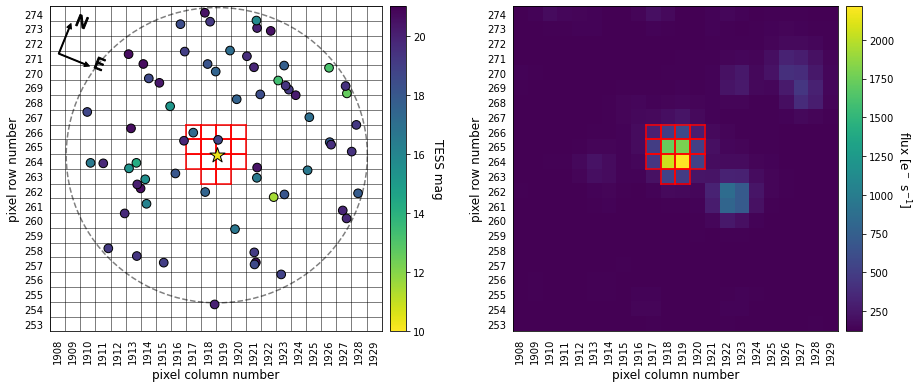

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,144193715,10.3390,9.634,9.176,9.139,327.753498,-43.562356,0.900000,0.793449,5243.0,9.151590,0.000,0.000
1,2027392387,18.7091,NaN,NaN,NaN,327.751141,-43.556864,NaN,NaN,4948.0,0.722038,20.705,342.726
2,144193716,17.1720,15.530,14.861,14.753,327.737607,-43.557862,0.355348,0.368329,3265.0,2.288510,44.501,291.314
3,2027392389,19.7882,NaN,NaN,NaN,327.734667,-43.561974,NaN,NaN,NaN,-1.504080,49.142,271.598
4,144193711,17.4941,16.196,15.762,15.422,327.755073,-43.576764,0.600000,0.902351,3897.0,0.546512,52.029,175.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,144193726,12.6126,11.956,11.584,11.510,327.804825,-43.522538,0.990000,0.920339,5615.0,2.425870,196.184,43.075
62,2027392320,19.7666,NaN,NaN,NaN,327.829224,-43.565918,NaN,NaN,NaN,-0.311730,197.954,93.741
63,2027392399,19.4586,NaN,NaN,NaN,327.802751,-43.520177,NaN,NaN,NaN,1.236850,198.938,40.264
64,144194632,17.8322,16.078,15.409,15.322,327.829875,-43.555590,0.470000,0.431833,3521.0,1.459310,200.737,83.057


In [4]:
ap = np.array([[1918, 263], [1919, 263], [1917, 264], [1918, 264], 
               [1919, 264], [1920, 264], [1917, 265], [1918, 265], 
               [1919, 265], [1920, 265], [1917, 266], [1918, 266], 
               [1919, 266], [1920, 266]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,144193715,10.3390,9.634,9.176,9.139,327.753498,-43.562356,0.900000,0.793449,5243.0,9.151590,0.000,0.000,9.979291e-01,0.000721
1,2027392387,18.7091,NaN,NaN,NaN,327.751141,-43.556864,NaN,NaN,4948.0,0.722038,20.705,342.726,4.208989e-04,0.000000
2,144193716,17.1720,15.530,14.861,14.753,327.737607,-43.557862,0.355348,0.368329,3265.0,2.288510,44.501,291.314,1.090483e-03,0.659383
3,2027392389,19.7882,NaN,NaN,NaN,327.734667,-43.561974,NaN,NaN,NaN,-1.504080,49.142,271.598,6.885192e-05,0.000000
4,144193711,17.4941,16.196,15.762,15.422,327.755073,-43.576764,0.600000,0.902351,3897.0,0.546512,52.029,175.470,2.104410e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,144193726,12.6126,11.956,11.584,11.510,327.804825,-43.522538,0.990000,0.920339,5615.0,2.425870,196.184,43.075,6.734927e-23,0.000000
62,2027392320,19.7666,NaN,NaN,NaN,327.829224,-43.565918,NaN,NaN,NaN,-0.311730,197.954,93.741,1.855046e-28,0.000000
63,2027392399,19.4586,NaN,NaN,NaN,327.802751,-43.520177,NaN,NaN,NaN,1.236850,198.938,40.264,3.589793e-26,0.000000
64,144194632,17.8322,16.078,15.409,15.322,327.829875,-43.555590,0.470000,0.431833,3521.0,1.459310,200.737,83.057,2.545761e-28,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

144193716


# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 144193715.
Calculating EB and EBx2P scenario probabilities for 144193715.
Calculating PTP scenario probability for 144193715.
Calculating PEB and PEBx2P scenario probabilities for 144193715.
Calculating STP scenario probability for 144193715.
Calculating SEB and SEBx2P scenario probabilities for 144193715.
Calculating DTP scenario probability for 144193715.
Calculating DEB and DEBx2P scenario probabilities for 144193715.
Calculating BTP scenario probability for 144193715.
Calculating BEB and BEBx2P scenario probabilities for 144193715.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 144193716.
Wall time: 17min 15s


In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.019313182263784867
NFPP =  1.8824126229769194e-10


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,144193715,TP,0.900000,0.793449,9.151196,88.092474,0.291266,0.660775,137.966908,2.679011,0.000000,0.000000,6.222169e-01
1,144193715,EB,0.900000,0.793449,9.151196,84.821529,0.222460,0.910987,138.624211,0.000000,0.101294,0.121853,4.587694e-17
2,144193715,EBx2P,0.900000,0.793449,18.302391,88.315921,0.629629,0.645480,160.766815,0.000000,0.867399,0.793449,1.436265e-09
3,144193715,PTP,0.900000,0.793449,9.151196,88.447793,0.388317,0.375458,114.185601,2.714443,0.000000,0.000000,1.364639e-01
4,144193715,PEB,0.900000,0.793449,9.151196,88.234470,0.505434,0.571779,183.842374,0.000000,0.130740,0.160033,2.893083e-15
5,144193715,PEBx2P,0.900000,0.793449,18.302391,87.638209,0.904340,0.845268,209.804592,0.000000,0.871315,0.793449,6.884957e-13
6,144193715,STP,0.881941,0.793449,9.151196,89.004252,0.376938,0.068471,17.968567,3.368443,0.000000,0.000000,1.570558e-02
7,144193715,SEB,0.257959,0.281641,9.151196,89.227260,0.203712,0.759868,161.254511,0.000000,0.056851,0.100000,1.669678e-05
8,144193715,SEBx2P,0.265562,0.288258,18.302391,89.338418,0.351670,0.788017,178.782695,0.000000,0.257651,0.281373,9.983502e-06
9,144193715,DTP,0.900000,0.793449,9.151196,88.265785,0.221768,0.751445,153.871786,2.751136,0.000000,0.000000,2.220060e-01


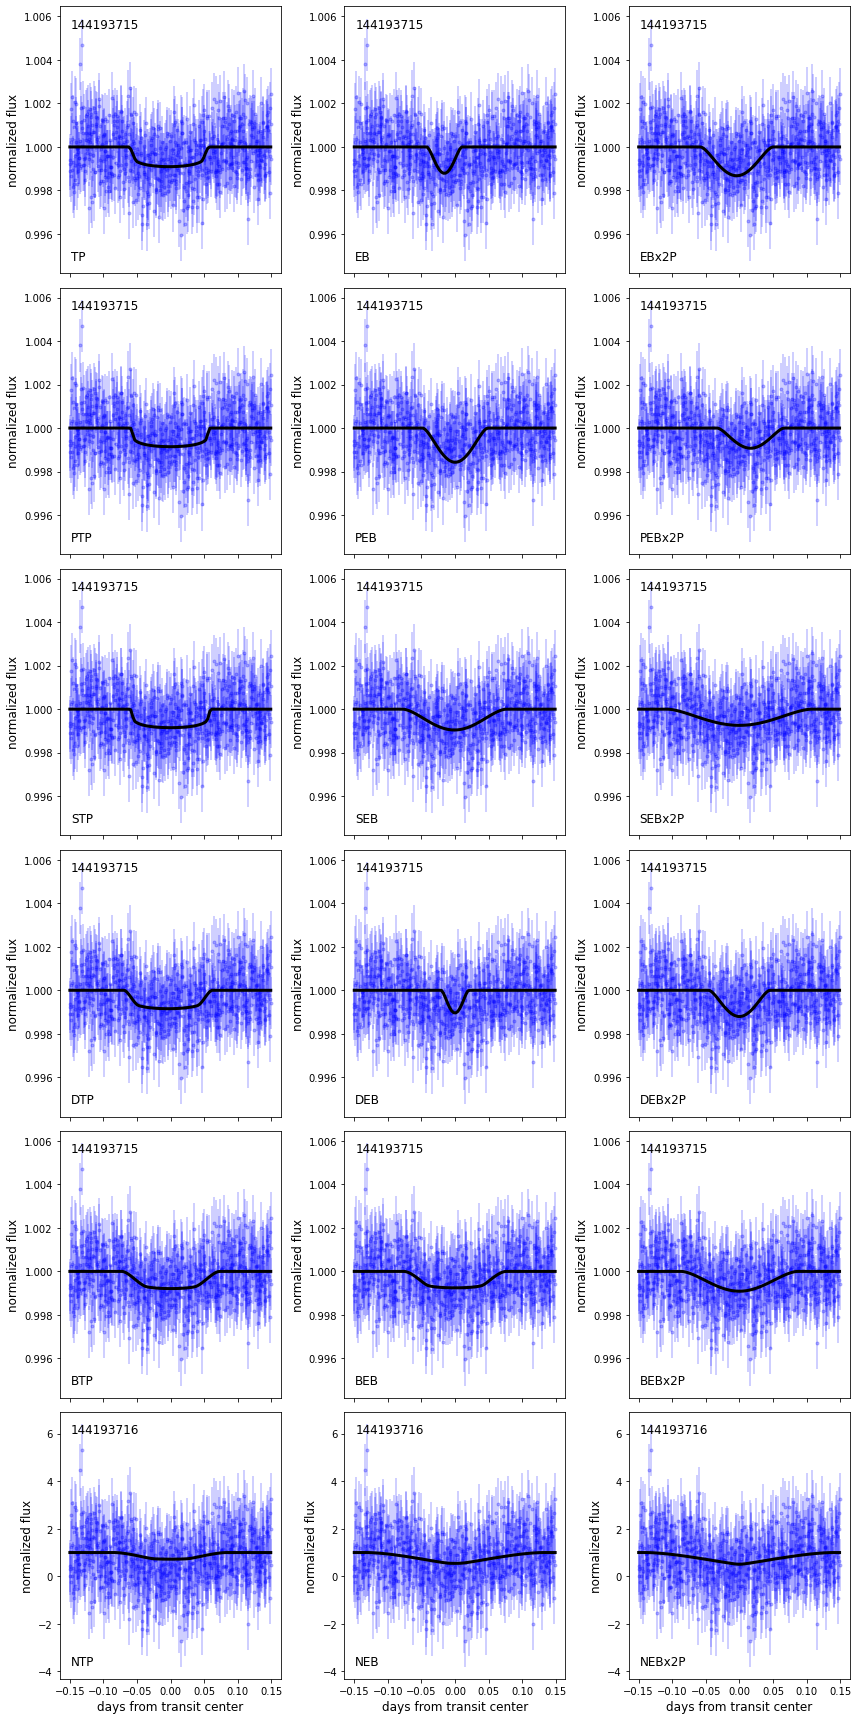

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))